# Workflow: 
## 1) Geological model generation/definition
## 2) Training data generation for PCA
## 3) PCA

In [1]:
import numpy as np


from numpy import expand_dims
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint

import random
from random import randint
import matplotlib.pyplot as plt

import tensorflow as tf
tf.compat.v1.enable_eager_execution()

import keras
from keras.optimizers import adam_v2
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.layers import Reshape
from keras.layers import Conv2DTranspose
from keras.utils.vis_utils import plot_model
from keras.datasets.mnist import load_data
from keras.layers import BatchNormalization
from keras.layers import AveragePooling2D
from keras.layers import MaxPooling2D
from keras.datasets import mnist

## 1. Model generation: Import training image

In [2]:
data = np.loadtxt('ti1.txt',skiprows=3)

In [3]:
data=np.reshape(data, (470, 470))
data.shape

(470, 470)

In [4]:
def plot_im1(img):
    plt.figure(figsize=(20, 4))
    plt.imshow(img,interpolation='none')
    plt.jet()
    plt.title('TI '+str(img.shape))

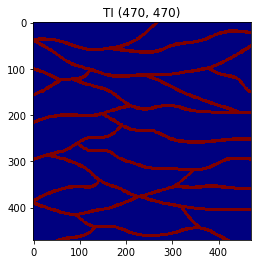

In [5]:
plot_im1(data)

# 2.Training data generation: 
## 10000 samples 64x64

In [6]:
# Crop randomly the image
def random_crop(image):
  cropped_image = tf.image.random_crop(
      image, size=[64, 64])
  cropped_image=cropped_image.numpy()
  return cropped_image

In [7]:
# Generate 10 000 64x64 realizations
train_size= 10000
training_data=[None] * train_size
for i in range(train_size):
    training_data[i]=random_crop(data)

(64, 64)


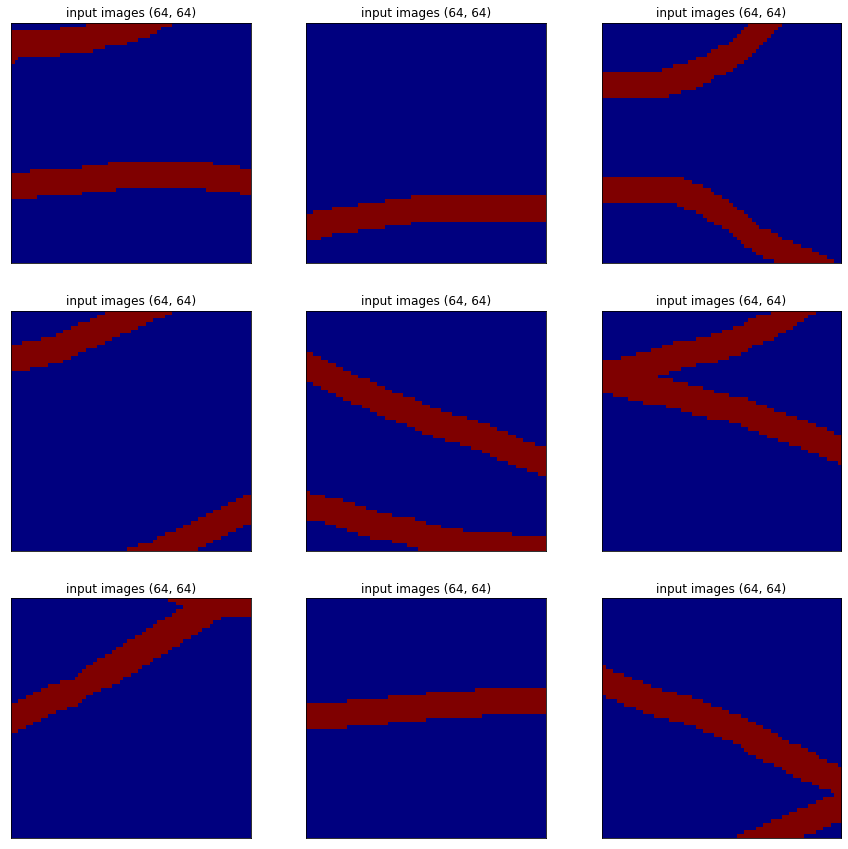

In [8]:
# plot some subset of images
print(training_data[1].shape)
#plot_im(training_data[3])
n = 10
plt.figure(figsize=(15, 15))
for i in range(9):
    # Display original
    ax = plt.subplot(3, 3, i + 1)
    #plt.imshow(test_x[i].reshape(28, 28))
    #plt.imshow(original[i])
    plt.imshow(training_data[i],interpolation='none')
    plt.jet()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('input images '+str(training_data[1].shape))

In [9]:
training_data_np = np.dstack(training_data)
print(training_data_np.shape)
training_data_np = np.rollaxis(training_data_np,-1)
print(training_data_np.shape)

(64, 64, 10000)
(10000, 64, 64)


In [10]:
training_data_np.shape[1]

64

In [11]:
train_data=np.reshape(training_data_np,(len(training_data_np),training_data_np.shape[1]*training_data_np.shape[1]))
print(train_data.shape)

(10000, 4096)


# 3. PCA

In [12]:
#import
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [13]:
#standardize
X=StandardScaler().fit_transform(train_data)

In [14]:
# center
print(train_data.shape)
print(train_data.mean(axis=0).shape)
X=train_data-train_data.mean(axis=0)
print(X.shape)

(10000, 4096)
(4096,)
(10000, 4096)


In [15]:
# fit full-dimensional PCA and find number of components corresponding 75% variance
Pca=PCA(n_components=400)
X_trunc=Pca.fit_transform(X)
position = np.argmax(np.cumsum(Pca.explained_variance_ratio_)>= 0.75)
print(position)

37


In [16]:
#fit PCA with number of components that cover 75% variance - 37 components
Pca37=PCA(n_components=37)

In [17]:
#apply PCA to get projection on reduced basis
X_trunc_37=Pca37.fit_transform(X)
print(X_trunc_37.shape)

(10000, 37)


In [18]:
#inverse transform (project back)
X_proj=Pca37.inverse_transform(X_trunc_37)
print(X_proj.shape)

(10000, 4096)


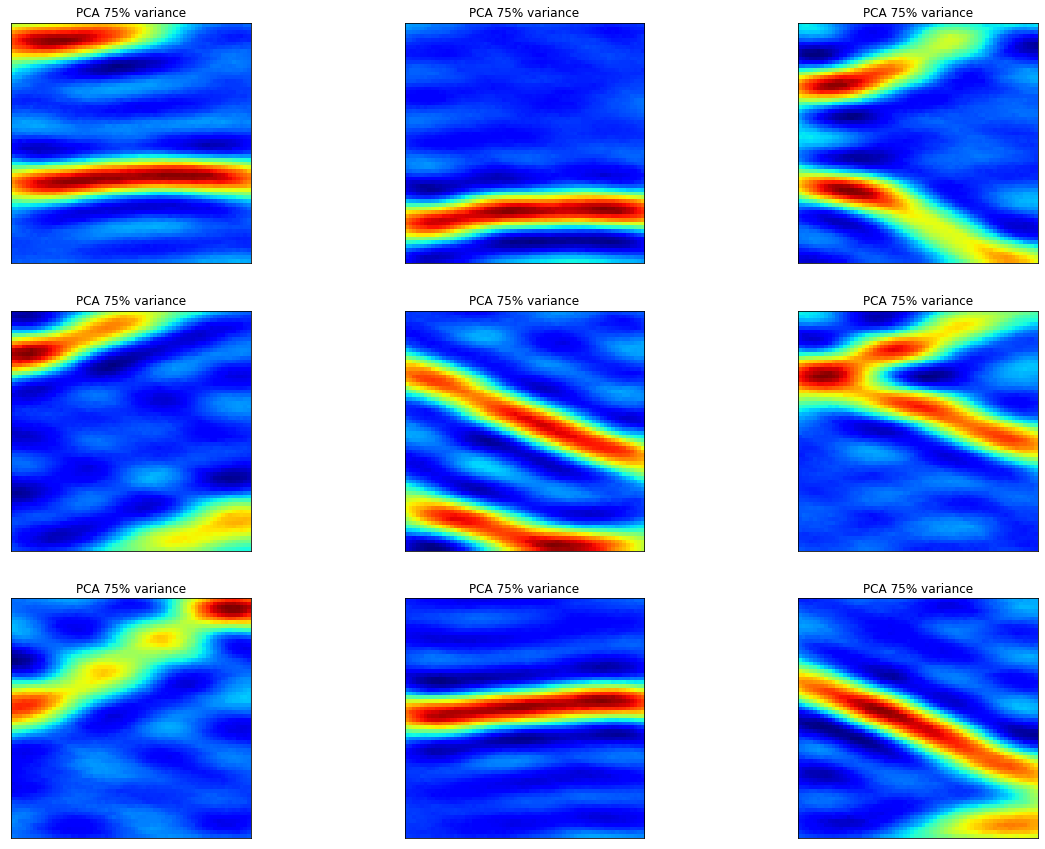

In [19]:
#visualize 
n = 3
plt.figure(figsize=(20, 15))
for i in range(n*n):

    # Display original
    ax = plt.subplot(n, n, i + 1)
    #plt.imshow(test_x[i].reshape(28, 28))
    plt.imshow(X_proj[i].reshape(64, 64))
    plt.jet()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('PCA 75% variance')
plt.show()